<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/316_Optimizing_Steel_Strength_using_Metaheuristic_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/ljjfrrHlxCw

**Finding the best alloy with maximum yield strength using Metaheuristic algorithm approaches <br>**

In this example, we will work with the steel alloy data set. <br>
Download from here: https://www.kaggle.com/datasets/fuarresvij/steel-test-data

<p>
The data set contains the elemental composition of different alloys and their respective yield and tensile strengths. A machine learning model can be trained on this data, allowing us to predict the strength of an alloy based on its chemical composition. But, for this exercise, let us try to find the optimized alloy composition with the best yield strength. <p>

Let us explore metaheuristic approaches, especially the genetic algorithm and the differential evolution algorithm. <p>

Differential evolution (DE)is quite similar to the genetic algorithm (GA) with a few differences. DE relies on the distance and directional information through unit vectors for reproduction. Also, in DE, the crossover is applied after mutation unlike GA. In addition, the mutation operator is not created from a probability distribution, but from the creation of the unit vector.  

In [ ]:
#Read the csv file and capture data into a pandas dataframe
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/data/steel_strength.csv")

**Understand the data**

In [ ]:
df.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


Check if there is any null data. There are a few missing from the elongation column but we will not use it for our exercise.

In [ ]:
df.isna().sum()

formula             0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c,312.0,0.096442,0.109008,0.00,0.010,0.030,0.1825,0.43
mn,312.0,0.146250,0.397102,0.01,0.010,0.010,0.0800,3.00
si,312.0,0.221218,0.580796,0.01,0.010,0.010,0.1100,4.75
cr,312.0,8.043830,5.426169,0.01,3.100,9.050,12.5200,17.50
ni,312.0,8.184006,6.337055,0.01,0.960,8.500,12.1175,21.00
mo,312.0,2.766090,1.832908,0.02,1.500,2.210,4.0900,9.67
v,312.0,0.183750,0.452462,0.00,0.010,0.010,0.1275,4.32
n,312.0,0.005545,0.018331,0.00,0.000,0.000,0.0000,0.15
nb,312.0,0.035449,0.161537,0.00,0.010,0.010,0.0100,2.50
co,312.0,7.008782,6.254431,0.01,0.010,7.085,13.4800,20.10


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'mn'}>,
        <Axes: title={'center': 'si'}>, <Axes: title={'center': 'cr'}>],
       [<Axes: title={'center': 'ni'}>, <Axes: title={'center': 'mo'}>,
        <Axes: title={'center': 'v'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'nb'}>, <Axes: title={'center': 'co'}>,
        <Axes: title={'center': 'w'}>, <Axes: title={'center': 'al'}>],
       [<Axes: title={'center': 'ti'}>,
        <Axes: title={'center': 'yield strength'}>,
        <Axes: title={'center': 'tensile strength'}>,
        <Axes: title={'center': 'elongation'}>]], dtype=object)

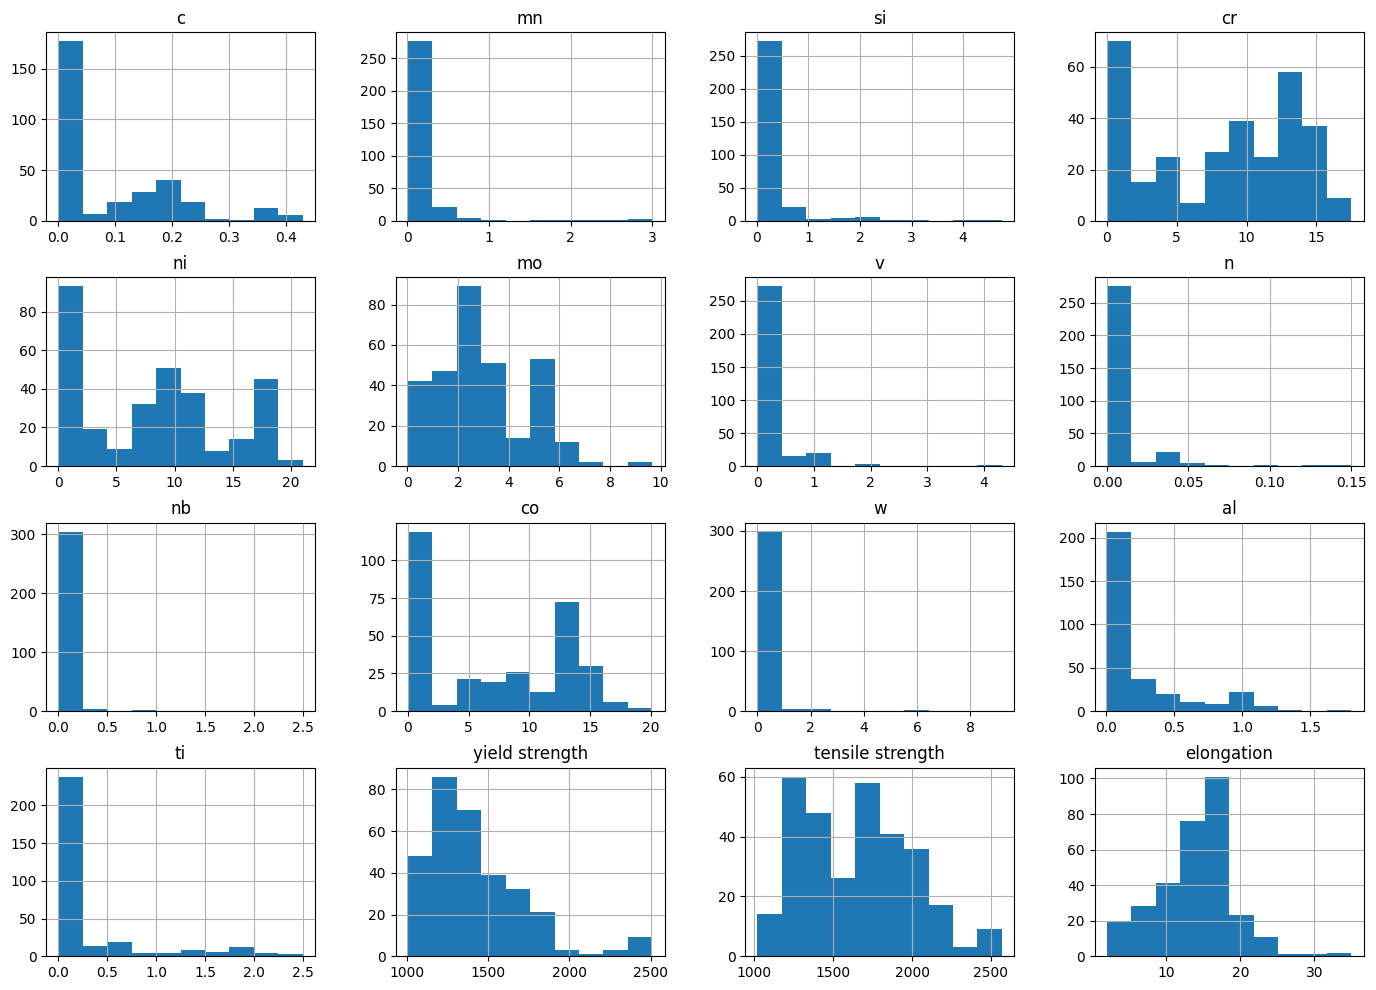

In [ ]:
df.hist(figsize=(17,12))

Check for correlations of composition with the yield strength. This gives us an idea about which elements (features) are important in predicting and modeling  the strength.

In [ ]:
df.corrwith(df["yield strength"])

<ipython-input-6-0b8e28b47c07>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df["yield strength"])


c                   0.146949
mn                 -0.172716
si                 -0.131461
cr                 -0.408730
ni                  0.252954
mo                  0.064278
v                   0.200595
n                  -0.117023
nb                  0.032042
co                  0.200274
w                  -0.025941
al                 -0.035487
ti                  0.510252
yield strength      1.000000
tensile strength    0.821071
elongation         -0.575289
dtype: float64

Not much correlation of yield strength with Mo, Nb, W or Al but good correlation with C, Mn, Si, Cr, Ni, V, and Co. We can choose to not include the less correlated features but let's include them for this exercise.

In [ ]:
#Define the X values by dropping all irrelevant columns
X = df.drop(columns=["formula", "elongation", "tensile strength", "yield strength"])

In [ ]:
X.head()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55


In [ ]:
#Define y
y = df['yield strength']

Split data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.2, random_state = 42)

Import the ML algorithm for regression - here, we will import the Random Forest Regressor from scikit-learn.<br>
Please note that Colab comes with most of the required libraries. You need to make sure you install all the required libraries in case you are running the code locally.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Instantiate the model by defining the appropriate hyperparameters. We will discuss hyperparameter optimization in the next tutorial.

In [ ]:
 model = RandomForestRegressor(n_estimators=100, max_depth=100)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100)

Predict using the trained model on our test data.

In [ ]:
y_pred = model.predict(X_test)

Test the model performance on our test data by checking the RMSE values.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

RMSE:  111.59215897605219


Plot actual vs. predicted to see if they fall into approximately a straight line.

Text(0, 0.5, 'Predicted')

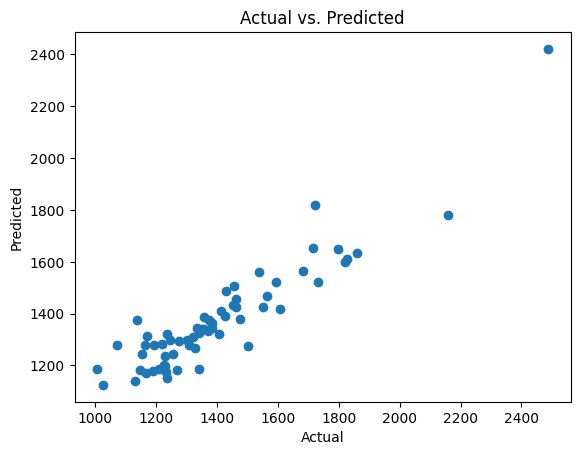

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Out of curiosity, let us check how good the fit is between actual and predicted by fitting to a linear regression and calculating R squared.

In [ ]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
lin_model = LinearRegression()
#fit regression model
lin_model.fit((y_test.values.reshape(-1, 1)), (y_pred))
#calculate R-squared of regression model
r_squared = lin_model.score((y_test.values.reshape(-1, 1)), (y_pred))
print("R suqared value is: ", r_squared)

R suqared value is:  0.8488000475842908


Let us also check the feature ranking to assess the importance of each dfeature, as reported by Random Forest.

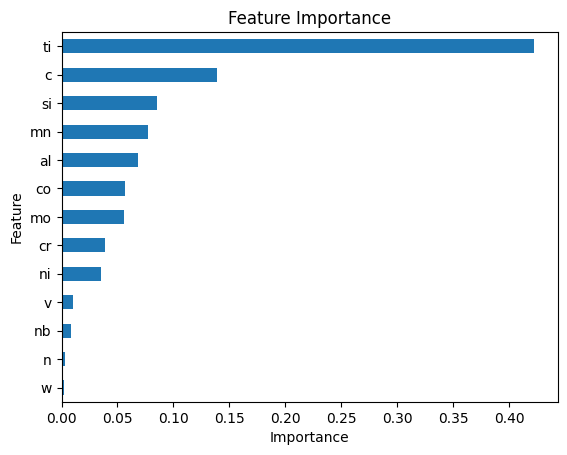

In [ ]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = model.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features)
# Plot 10 most important features
feat_imp.sort_values().plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

Now that we are satisfied with our model, we can define a new model object, which we will train on the full data set.

In [ ]:
model_full= RandomForestRegressor(n_estimators=100, max_depth=100,
random_state =42)
model_full.fit(X, y)

RandomForestRegressor(max_depth=100, random_state=42)

**Optimization of the features (composition) using the Genetic ALgorithm** <br>
We need to define the model_full as an objective function that we'd like to optimize. <br>
We can write our own Genetic ALgorithm, like we did in the last tutorial. But, let us not waste time and use published code, from the geneticalgorithm library. <br>
https://pypi.org/project/geneticalgorithm/

In [ ]:
!pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15094 sha256=73d0b9f49b9244683a7ec60b16631510ace1dd69f97ab5901b919c633d26ede9
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [ ]:
from geneticalgorithm import geneticalgorithm as ga

Define the objective function as model.predict which predicts the yield strength. We add a negative sign to the result as we want to minimize the objective function (maximize the yield strength).

In [ ]:
def obj_fun(X):
    X = [X]
    results = model_full.predict(X)

    return -results  #Negative sign since we are trying to minimize the value.

Define the boundaries for each element composition. We will define them as the minum and maximum values from the data set, for each element. Remember that these are the boudnary conditions for our Genetic Algorithm.

In [ ]:
boundaries = np.array([[df['c'].min(), df['c'].max()],
[df['mn'].min(), df['mn'].max()],
[df['si'].min(), df['si'].max()],
[df['cr'].min(), df['cr'].max()],
[df['ni'].min(), df['ni'].max()],
[df['mo'].min(), df['mo'].max()],
[df['v'].min(), df['v'].max()],
[df['n'].min(), df['n'].max()],
[df['nb'].min(), df['nb'].max()],
[df['co'].min(), df['co'].max()],
[df['w'].min(), df['w'].max()],
[df['al'].min(), df['al'].max()],
[df['ti'].min(), df['ti'].max()]])

In [ ]:
boundaries

array([[0.00e+00, 4.30e-01],
       [1.00e-02, 3.00e+00],
       [1.00e-02, 4.75e+00],
       [1.00e-02, 1.75e+01],
       [1.00e-02, 2.10e+01],
       [2.00e-02, 9.67e+00],
       [0.00e+00, 4.32e+00],
       [0.00e+00, 1.50e-01],
       [0.00e+00, 2.50e+00],
       [1.00e-02, 2.01e+01],
       [0.00e+00, 9.18e+00],
       [1.00e-02, 1.80e+00],
       [0.00e+00, 2.50e+00]])

Define the algorithm parameters, and instantiate the GA model object.

In [ ]:
algorithm_param = {'max_num_iteration': 10,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

In [ ]:
ga_model=ga(function=obj_fun,dimension=13,variable_type='real',variable_boundaries=boundaries, algorithm_parameters=algorithm_param)

Run the model. This may take a while depending on the data set size.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||_____________________________________________ 10.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||________________________________________ 20.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||___________________________________ 30.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||______________________________ 40.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||_________________________ 50.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||||||||||||____________________ 60.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||_______________ 70.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||||||||||||||||||||||__________ 80.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||||||||||||_____ 90.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

 The best solution found:
 [ 0.27198325  0.59108423  0.43344473 15.65574933 18.28337792  6.81790563
  1.62703437  0.096666    0.52023745 13.14531384  7.68088608  0.66996785
  2.18230317]

 Objective function:
 -2443.1850000000018


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


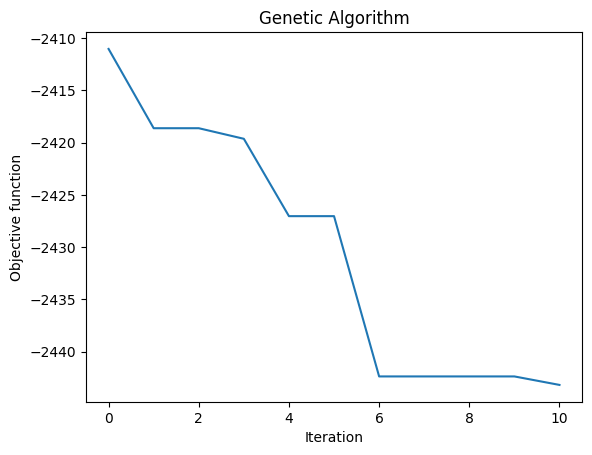

In [ ]:
ga_model.run()

Look at the output from the optimization. This gives us the optimized feature (composition) values for each feature. We will also report the optimized (max) yield strength for this theoretical alloy.

In [ ]:
result = ga_model.output_dict
result

{'variable': array([ 0.27198325,  0.59108423,  0.43344473, 15.65574933, 18.28337792,
         6.81790563,  1.62703437,  0.096666  ,  0.52023745, 13.14531384,
         7.68088608,  0.66996785,  2.18230317]),
 'function': -2443.1850000000018}

In [ ]:
print("Results: ")
print('c:', result['variable'][0])
print('mn:', result['variable'][1])
print('si:', result['variable'][2])
print('cr:', result['variable'][3])
print('ni:', result['variable'][4])
print('mo:', result['variable'][5])
print('v:', result['variable'][6])
print('n:', result['variable'][7])
print('nb:', result['variable'][8])
print('co:', result['variable'][9])
print('w:', result['variable'][10])
print('al:', result['variable'][11])
print('ti:', result['variable'][12])

print("Max Yield Strength: ", -result['function'])

Results: 
c: 0.27198324629457415
mn: 0.5910842254101539
si: 0.43344473108309195
cr: 15.655749327844983
ni: 18.283377924838423
mo: 6.817905633702386
v: 1.627034373670009
n: 0.09666599709025266
nb: 0.5202374492694086
co: 13.145313841037725
w: 7.680886084960117
al: 0.6699678480712342
ti: 2.1823031744213086
Max Yield Strength:  2443.1850000000018


# Optimizing using the Differential Evolution algorithm from the scipy library

In [ ]:
from scipy.optimize import differential_evolution

Next, let's define our objective function. It will take an array of inputs corresponding to the model inputs and return a prediction for each set:

In [ ]:
def obj_fun(X):
    X = [X]
    results = model_full.predict(X)
    obj_fun.counter += 1
    print(obj_fun.counter)
    return -results

Next, we need to define the upper and lower bounds for each of the inputs. Let’s use the maximum and minimum values available in the data for each input:

In [ ]:
boundaries = [(df['c'].min(), df['c'].max()),
(df['mn'].min(), df['mn'].max()),
(df['si'].min(), df['si'].max()),
(df['cr'].min(), df['cr'].max()),
(df['ni'].min(), df['ni'].max()),
(df['mo'].min(), df['mo'].max()),
(df['v'].min(), df['v'].max()),
(df['n'].min(), df['n'].max()),
(df['nb'].min(), df['nb'].max()),
(df['co'].min(), df['co'].max()),
(df['w'].min(), df['w'].max()),
(df['al'].min(), df['al'].max()),
(df['ti'].min(), df['ti'].max())]

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html
obj_fun.counter = 0
opt_results = differential_evolution(obj_fun, boundaries)



In [ ]:
print('c:', opt_results.x[0])
print('mn:', opt_results.x[1])
print('si:', opt_results.x[2])
print('cr:', opt_results.x[3])
print('ni:', opt_results.x[4])
print('mo:', opt_results.x[5])
print('v:', opt_results.x[6])
print('n:', opt_results.x[7])
print('nb:', opt_results.x[4])
print('co:', opt_results.x[5])
print('w:', opt_results.x[6])
print('al:', opt_results.x[7])
print('ti:', opt_results.x[7])

print("Max Yield Strength: ", -opt_results.fun)

c: 0.10843174492185062
mn: 2.475402041751802
si: 2.240917390599842
cr: 14.972734313714877
ni: 18.23020472488688
mo: 6.020484747030876
v: 0.5782488173169105
n: 0.11086776618568907
nb: 18.23020472488688
co: 6.020484747030876
w: 0.5782488173169105
al: 0.11086776618568907
ti: 0.11086776618568907
Max Yield Strength:  2450.3090000000016
